# Connect to MySQL Database

In [29]:
#%pip install mysql-connector-python
#%pip install tabulate
import mysql.connector
from tabulate import tabulate
import matplotlib.pyplot as plt

In [30]:
# AWS RDS MySQL database credentials
host = 'musicdb.coqkhijceys5.us-east-1.rds.amazonaws.com'
port = '3306'  # Default MySQL port
user = 'IE6700'
password = '6700IELabSpring2024'
#database = 'musicdb'

# Connect to the AWS RDS MySQL database
try:
    connection = mysql.connector.connect(
        host=host,
        port=port,
        user=user,
        password=password,
        #database=database
    )

    if connection.is_connected():
        db_info = connection.get_server_info()
        print(f"Connected to MySQL Server version {db_info}")

except mysql.connector.Error as error:
    print(f"Error connecting to MySQL: {error}")

# Create a cursor object using the connection
cursor = connection.cursor()

Connected to MySQL Server version 8.0.35


# Create and Populate MySQL Database

In [8]:
# Create the database 'music' if it doesn't exist
cursor.execute("CREATE DATABASE IF NOT EXISTS music")

# Use the 'music' database
cursor.execute("USE music")

# SQL statements to create tables
create_statements = [
    """
    CREATE TABLE IF NOT EXISTS `user` (
        `user_id` INT(5),
        `name` VARCHAR(50),
        `age` INT(5),
        `gender` VARCHAR(50),
        PRIMARY KEY (`user_id`)
    )
    """,
    """
    CREATE TABLE IF NOT EXISTS `account` (
        `account_number` BIGINT(20),
        `payment_method` VARCHAR(50),
        `email` VARCHAR(50),
        `address` VARCHAR(50),
        PRIMARY KEY (`account_number`)
    )
    """,
    """
    CREATE TABLE IF NOT EXISTS `manages` (
        `user_id` INT(5),
        `account_number` BIGINT(20),
        PRIMARY KEY (`user_id`, `account_number`),
        FOREIGN KEY (`user_id`) REFERENCES `user` (`user_id`),
        FOREIGN KEY (`account_number`) REFERENCES `account` (`account_number`)
    )
    """,
    """
    CREATE TABLE IF NOT EXISTS `playlist` (
        `playlist_id` INT(5),
        `name` VARCHAR(50),
        `track_count` INT(5),
        PRIMARY KEY (`playlist_id`)
    )
    """,
    """
    CREATE TABLE IF NOT EXISTS `creates` (
        `user_id` INT(5),
        `playlist_id` INT(5),
        PRIMARY KEY (`user_id`, `playlist_id`),
        FOREIGN KEY (`user_id`) REFERENCES `user` (`user_id`),
        FOREIGN KEY (`playlist_id`) REFERENCES `playlist` (`playlist_id`)
    )
    """,
    """
    CREATE TABLE IF NOT EXISTS `song` (
        `song_id` INT(5),
        `name` VARCHAR(50),
        `genre` VARCHAR(50),
        `length` INT(5),
        PRIMARY KEY (`song_id`)
    )
    """,
    """
    CREATE TABLE IF NOT EXISTS `contains` (
        `playlist_id` INT(5),
        `song_id` INT(5),
        PRIMARY KEY (`playlist_id`, `song_id`),
        FOREIGN KEY (`playlist_id`) REFERENCES `playlist` (`playlist_id`),
        FOREIGN KEY (`song_id`) REFERENCES `song` (`song_id`)
    )
    """,
    """
    CREATE TABLE IF NOT EXISTS `artist` (
        `artist_id` VARCHAR(50),
        `name` VARCHAR(50),
        PRIMARY KEY (`artist_id`)
    )
    """,
    """
    CREATE TABLE IF NOT EXISTS `wrote` (
        `artist_id` VARCHAR(50),
        `song_id` INT(5),
        PRIMARY KEY (`artist_id`, `song_id`),
        FOREIGN KEY (`artist_id`) REFERENCES `artist` (`artist_id`),
        FOREIGN KEY (`song_id`) REFERENCES `song` (`song_id`)
    )
    """,
    """
    CREATE TABLE IF NOT EXISTS `album` (
        `album_id` VARCHAR(50),
        `name` VARCHAR(50),
        `genre` VARCHAR(50),
        `track_count` INT(3),
        PRIMARY KEY (`album_id`)
    )
    """,
    """
    CREATE TABLE IF NOT EXISTS `inside` (
        `album_id` VARCHAR(50),
        `song_id` INT(5),
        PRIMARY KEY (`album_id`, `song_id`),
        FOREIGN KEY (`album_id`) REFERENCES `album` (`album_id`),
        FOREIGN KEY (`song_id`) REFERENCES `song` (`song_id`)
    )
    """,
    """
    CREATE TABLE IF NOT EXISTS `produced` (
        `album_id` VARCHAR(50),
        `artist_id` VARCHAR(50),
        PRIMARY KEY (`album_id`, `artist_id`),
        FOREIGN KEY (`album_id`) REFERENCES `album` (`album_id`),
        FOREIGN KEY (`artist_id`) REFERENCES `artist` (`artist_id`)
    )
    """,
    """
    CREATE TABLE IF NOT EXISTS `concert` (
        `concert_id` VARCHAR(50),
        `name` VARCHAR(50),
        `venue` VARCHAR(50),
        PRIMARY KEY (`concert_id`)
    )
    """,
    """
    CREATE TABLE IF NOT EXISTS `performs` (
        `concert_id` VARCHAR(50),
        `artist_id` VARCHAR(50),
        PRIMARY KEY (`concert_id`, `artist_id`),
        FOREIGN KEY (`concert_id`) REFERENCES `concert` (`concert_id`),
        FOREIGN KEY (`artist_id`) REFERENCES `artist` (`artist_id`)
    )
    """,
    """
    CREATE TABLE IF NOT EXISTS `product` (
        `product_id` VARCHAR(50),
        `price` INT(5),
        PRIMARY KEY (`product_id`)
    )
    """,
    """
    CREATE TABLE IF NOT EXISTS `ticket` (
        `product_id` VARCHAR(50),
        `seat_number` INT(5),
        `seat_type` VARCHAR(50),
        PRIMARY KEY (`product_id`),
        FOREIGN KEY (`product_id`) REFERENCES `product` (`product_id`)
    )
    """,
    """
    CREATE TABLE IF NOT EXISTS `available` (
        `concert_id` VARCHAR(50),
        `product_id` VARCHAR(50),
        `number_available` INT(5),
        PRIMARY KEY (`concert_id`, `product_id`),
        FOREIGN KEY (`concert_id`) REFERENCES `concert` (`concert_id`),
        FOREIGN KEY (`product_id`) REFERENCES `product` (`product_id`)
    )
    """,
    """
    CREATE TABLE IF NOT EXISTS `purchases` (
        `user_id` INT(5),
        `product_id` VARCHAR(50),
        PRIMARY KEY (`user_id`, `product_id`),
        FOREIGN KEY (`user_id`) REFERENCES `user` (`user_id`),
        FOREIGN KEY (`product_id`) REFERENCES `product` (`product_id`)
    )
    """,
    """
    CREATE TABLE IF NOT EXISTS `vinyl` (
        `product_id` VARCHAR(50),
        `album_id` VARCHAR(50),
        PRIMARY KEY (`product_id`, `album_id`),
        FOREIGN KEY (`product_id`) REFERENCES `product` (`product_id`),
        FOREIGN KEY (`album_id`) REFERENCES `album` (`album_id`)
    )
    """
]

# Execute each table creation statement
for statement in create_statements:
    cursor.execute(statement)

print("Tables created successfully.")

Tables created successfully.


In [9]:
# SQL statements to insert data into tables
insert_statements = [
    """
    INSERT INTO `user` (`user_id`,`name`,`age`,`gender`)
    VALUES
      (1,"Alexa Blanchard",18,"male"),
      (2,"Joan Solis",16,"female"),
      (3,"Athena Mccall",8,"female"),
      (4,"Octavius Walls",37,"male"),
      (5,"Rashad Shepard",33,"male"),
      (6,"Lane Stafford",64,"male"),
      (7,"Leroy Schwartz",89,"female"),
      (8,"Barbara Castro",3,"female"),
      (9,"Kermit Richard",33,"male"),
      (10,"Quinn Clay",5,"male"),
      (11,"Trevor Mccullough",43,"male"),
      (12,"Jennifer Cobb",68,"male"),
      (13,"Carla Barrett",39,"female"),
      (14,"Lilah Shepherd",82,"male"),
      (15,"Odysseus Morrow",2,"female")
    """,
    """
    INSERT INTO `account` (`account_number`,`payment_method`,`email`,`address`)
    VALUES
      (1562,"credit","nascetur.ridiculus@google.org","Ap #259-2207 Lorem Road"),
      (7299,"credit","neque.sed.eget@outlook.org","Ap #265-9331 In, Rd."),
      (3353,"credit","nunc.sed.libero@outlook.org","671-5962 Fusce Avenue"),
      (3783,"credit","tortor.at@yahoo.net","1454 Nec, Rd."),
      (1247,"debit","eget.metus@icloud.com","461-9590 Aliquam St."),
      (7933,"credit","erat@google.couk","P.O. Box 890, 4720 Molestie Avenue"),
      (8413,"debit","aliquet.diam.sed@yahoo.ca","846-9299 Cras Avenue"),
      (4364,"debit","semper@hotmail.net","P.O. Box 201, 4083 Metus. Avenue"),
      (1838,"debit","arcu.vel@outlook.com","7489 Eleifend, Street"),
      (4548,"debit","tincidunt.nibh@google.couk","1724 Fermentum Road"),
      (6238,"credit","sapien.cras@aol.couk","1251 Rutrum Rd."),
      (1763,"credit","cum.sociis@yahoo.couk","943-6909 Cursus. Rd."),
      (8125,"debit","magna@protonmail.org","6511 Ac Ave"),
      (8619,"debit","purus.gravida@google.edu","2919 Integer Av."),
      (2020,"credit","in.hendrerit@yahoo.net","Ap #258-5988 Orci. Street")
    """,
    """
    INSERT INTO `manages` (`user_id`, `account_number`)
    VALUES
      (1,1562),
      (2,7299),
      (3,3353),
      (4,3783),
      (5,1247),
      (6,7933),
      (7,8413),
      (8,4364),
      (9,1838),
      (10,4548),
      (11,6238),
      (12,1763),
      (13,8125),
      (14,8619),
      (15,2020)
    """,
    """
    INSERT INTO `playlist` (`playlist_id`,`name`,`track_count`)
    VALUES
      (8807,"felis",84),
      (5937,"varius",16),
      (4682,"vulputate",63),
      (2523,"egestas",93),
      (5221,"magna,",37),
      (8033,"posuere",26),
      (7624,"ut,",8),
      (8225,"vitae",46),
      (4102,"pretium",74),
      (3809,"nisi",51),
      (6504,"est,",78),
      (8736,"Donec",78),
      (4922,"et,",45),
      (8026,"consectetuer",97),
      (6814,"litora",59)
    """,
    """
    INSERT INTO `creates` (`user_id`, `playlist_id`)
    VALUES
      (1,8807),
      (2,5937),
      (3,4682),
      (4,2523),
      (5,5221),
      (6,8033),
      (7,7624),
      (8,8225),
      (9,4102),
      (10,3809),
      (11,6504),
      (12,8736),
      (13,4922),
      (14,8026),
      (15,6814)
    """,
    """
    INSERT INTO `song` (`song_id`,`name`,`genre`,`length`)
    VALUES
      (3137,"nisi","blues",9),
      (7159,"gravida.","pop",14),
      (6436,"sodales","instrumental",7),
      (7123,"posuere","electronic",15),
      (8657,"purus","electronic",10),
      (2519,"Proin","pop",8),
      (5175,"Aliquam","instrumental",2),
      (1207,"vel","classical",4),
      (6921,"egestas","rock",14),
      (2846,"Nunc","country",14),
      (9511,"neque","rap",3),
      (9876,"convallis","instrumental",1),
      (9959,"sed","blues",2),
      (1698,"ac","pop",15),
      (7567,"dignissim","electronic",12)
    """,
    """
    INSERT INTO `contains` (`playlist_id`,`song_id`)
    VALUES
      (8807,3137),
      (5937,7159),
      (4682,6436),
      (2523,7123),
      (5221,8657),
      (8033,2519),
      (7624,5175),
      (8225,1207),
      (4102,6921),
      (3809,2846),
      (6504,9511),
      (8736,9876),
      (4922,9959),
      (8026,1698),
      (6814,7567)
    """,
    """
    INSERT INTO `artist` (`artist_id`,`name`)
    VALUES
      ("982","Francis Rosa"),
      ("486","Ginger Gould"),
      ("914","Myles Bartlett"),
      ("690","Wyoming Beard"),
      ("653","Rigel Graham"),
      ("292","Karen Watts"),
      ("272","Raja Hurley"),
      ("210","Hanae Barlow"),
      ("361","Hayden Holder"),
      ("940","Medge Moreno"),
      ("526","Colleen Horn"),
      ("131","Jaime Quinn"),
      ("271","Aladdin Roy"),
      ("656","Aquila Noble"),
      ("149","Ferdinand Walker")
    """,
    """
    INSERT INTO `wrote` (`artist_id`,`song_id`)
    VALUES
      ("982",3137),
      ("486",7159),
      ("914",6436),
      ("690",7123),
      ("653",8657),
      ("292",2519),
      ("272",5175),
      ("210",1207),
      ("361",6921),
      ("940",2846),
      ("526",9511),
      ("131",9876),
      ("271",9959),
      ("656",1698),
      ("149",7567)
    """,
    """
    INSERT INTO `album` (`album_id`,`name`,`genre`,`track_count`)
    VALUES
      ("526","gravida","instrumental",75),
      ("131","a,","country",36),
      ("271","mattis","rock",17),
      ("656","aliquam","classical",50),
      ("149","Nulla","electronic",76),
      ("418","enim.","pop",35),
      ("445","lorem","classical",79),
      ("679","mauris","electronic",62),
      ("297","non","rap",65),
      ("178","ut","country",89),
      ("804","orci.","blues",66),
      ("653","est,","rock",23),
      ("133","dictum","country",47),
      ("496","sapien","rock",94),
      ("970","pellentesque","rap",7)
    """,
    """
    INSERT INTO `inside` (`album_id`,`song_id`)
    VALUES
      ("526",3137),
      ("131",7159),
      ("271",6436),
      ("656",7123),
      ("149",8657),
      ("418",2519),
      ("445",5175),
      ("679",1207),
      ("297",6921),
      ("178",2846),
      ("804",9511),
      ("653",9876),
      ("133",9959),
      ("496",1698),
      ("970",7567)
    """,
    """
    INSERT INTO `produced` (`album_id`,`artist_id`)
    VALUES
      ("526","982"),
      ("131","486"),
      ("271","914"),
      ("656","690"),
      ("149","653"),
      ("418","292"),
      ("445","272"),
      ("679","210"),
      ("297","361"),
      ("178","940"),
      ("804","526"),
      ("653","131"),
      ("133","271"),
      ("496","656"),
      ("970","149")
    """,
    """
    INSERT INTO `concert` (`concert_id`,`name`,`venue`)
    VALUES
      ("804","orci.","Patalillo"),
      ("653","est,","Alaminos"),
      ("133","dictum","Badajoz"),
      ("496","sapien","Bellante"),
      ("970","pellentesque","Calamba"),
      ("411","velit","Goulburn"),
      ("805","metus.","Brecon"),
      ("757","Curabitur","Nivelles"),
      ("574","Pellentesque","Serangoon"),
      ("628","tortor","Bischofshofen"),
      ("859","Phasellus","Goes"),
      ("815","dignissim","Leeuwarden"),
      ("482","vitae,","Jayapura"),
      ("338","dictum","Wanganui"),
      ("501","parturient","Rotorua")
    """,
    """
    INSERT INTO `performs` (`concert_id`,`artist_id`)
    VALUES
      ("804","982"),
      ("653","486"),
      ("133","914"),
      ("496","690"),
      ("970","653"),
      ("411","292"),
      ("805","272"),
      ("757","210"),
      ("574","361"),
      ("628","940"),
      ("859","526"),
      ("815","131"),
      ("482","271"),
      ("338","656"),
      ("501","149")
    """,
    """
    INSERT INTO `product` (`product_id`,`price`)
    VALUES
      ("859",193),
      ("815",660),
      ("482",454),
      ("338",522),
      ("501",133),
      ("160",953),
      ("901",28),
      ("167",596),
      ("431",603),
      ("239",211),
      ("294",45),
      ("468",870),
      ("197",385),
      ("962",150),
      ("909",135)
    """,
    """
    INSERT INTO `ticket` (`product_id`,`seat_number`, `seat_type`)
    VALUES
      ("859",559,"VIP"),
      ("815",319,"General Admission"),
      ("482",444,"VIP"),
      ("338",399,"General Admission"),
      ("501",56,"VIP"),
      ("160",79,"VIP"),
      ("901",185,"General Admission"),
      ("167",926,"General Admission"),
      ("431",258,"VIP"),
      ("239",889,"VIP"),
      ("294",484,"VIP"),
      ("468",834,"General Admission"),
      ("197",269,"General Admission"),
      ("962",396,"General Admission"),
      ("909",450,"VIP")
    """,
    """
    INSERT INTO `available` (`product_id`,`concert_id`, `number_available`)
    VALUES
      ("859","804",484),
      ("815","653",834),
      ("482","133",269),
      ("338","496",396),
      ("501","970",450),
      ("160","411",369),
      ("901","805",735),
      ("167","757",775),
      ("431","574",482),
      ("239","628",274),
      ("294","859",459),
      ("468","815",797),
      ("197","482",882),
      ("962","338",621),
      ("909","501",147)
    """,
    """
    INSERT INTO `purchases` (`user_id`,`product_id`)
    VALUES
      (1,"859"),
      (2,"815"),
      (3,"482"),
      (4,"338"),
      (5,"501"),
      (6,"160"),
      (7,"901"),
      (8,"167"),
      (9,"431"),
      (10,"239"),
      (11,"294"),
      (12,"468"),
      (13,"197"),
      (14,"962"),
      (15,"909")
    """,
    """
    INSERT INTO `vinyl` (`product_id`,`album_id`)
    VALUES
      ("859","526"),
      ("815","131"),
      ("482","271"),
      ("338","656"),
      ("501","149"),
      ("160","418"),
      ("901","445"),
      ("167","679"),
      ("431","297"),
      ("239","178"),
      ("294","804"),
      ("468","653"),
      ("197","133"),
      ("962","496"),
      ("909","970")
    """
]

# Execute each insert statement
for statement in insert_statements:
    cursor.execute(statement)

# Commit the changes to the database
connection.commit()

print("Data inserted successfully.")

Data inserted successfully.


# Query MySQL Database

In [4]:
# Use the 'music' database
cursor.execute("USE music")

In [18]:
# Query 1:  Simple Query 
# (Retrieve user information)
query = """
    SELECT *
    FROM user;
    """

# Execute the query
cursor.execute(query)

# Fetch all the results
results = cursor.fetchall()

# Get the column names from the cursor description
columns = [col[0] for col in cursor.description]

# Display the results as a table using tabulate
if results:
    print(tabulate(results, headers=columns, tablefmt='psql'))
else:
    print("No records found.")

+-----------+-------------------+-------+----------+
|   user_id | name              |   age | gender   |
|-----------+-------------------+-------+----------|
|         1 | Alexa Blanchard   |    18 | male     |
|         2 | Joan Solis        |    16 | female   |
|         3 | Athena Mccall     |     8 | female   |
|         4 | Octavius Walls    |    37 | male     |
|         5 | Rashad Shepard    |    33 | male     |
|         6 | Lane Stafford     |    64 | male     |
|         7 | Leroy Schwartz    |    89 | female   |
|         8 | Barbara Castro    |     3 | female   |
|         9 | Kermit Richard    |    33 | male     |
|        10 | Quinn Clay        |     5 | male     |
|        11 | Trevor Mccullough |    43 | male     |
|        12 | Jennifer Cobb     |    68 | male     |
|        13 | Carla Barrett     |    39 | female   |
|        14 | Lilah Shepherd    |    82 | male     |
|        15 | Odysseus Morrow   |     2 | female   |
+-----------+-------------------+-------+-----

In [19]:
# Query 2:  Aggregate Query 
# (Retrieve average age by gender)
query = """
    SELECT gender, AVG(age) AS average_age
    FROM user
    GROUP BY gender;
    """

# Execute the query
cursor.execute(query)

# Fetch all the results
results = cursor.fetchall()

# Get the column names from the cursor description
columns = [col[0] for col in cursor.description]

# Display the results as a table using tabulate
if results:
    print(tabulate(results, headers=columns, tablefmt='psql'))
else:
    print("No records found.")

+----------+---------------+
| gender   |   average_age |
|----------+---------------|
| male     |       42.5556 |
| female   |       26.1667 |
+----------+---------------+


In [20]:
# Query 3:  Inner/Outer Join Query 
# (Retrieve users and their playlists with track count)
query = """
    SELECT u.name AS user_name, p.name AS playlist_name, p.track_count
    FROM user u
    INNER JOIN creates c ON u.user_id = c.user_id
    INNER JOIN playlist p ON c.playlist_id = p.playlist_id;
    """

# Execute the query
cursor.execute(query)

# Fetch all the results
results = cursor.fetchall()

# Get the column names from the cursor description
columns = [col[0] for col in cursor.description]

# Display the results as a table using tabulate
if results:
    print(tabulate(results, headers=columns, tablefmt='psql'))
else:
    print("No records found.")

+-------------------+-----------------+---------------+
| user_name         | playlist_name   |   track_count |
|-------------------+-----------------+---------------|
| Alexa Blanchard   | felis           |            84 |
| Joan Solis        | varius          |            16 |
| Athena Mccall     | vulputate       |            63 |
| Octavius Walls    | egestas         |            93 |
| Rashad Shepard    | magna,          |            37 |
| Lane Stafford     | posuere         |            26 |
| Leroy Schwartz    | ut,             |             8 |
| Barbara Castro    | vitae           |            46 |
| Kermit Richard    | pretium         |            74 |
| Quinn Clay        | nisi            |            51 |
| Trevor Mccullough | est,            |            78 |
| Jennifer Cobb     | Donec           |            78 |
| Carla Barrett     | et,             |            45 |
| Lilah Shepherd    | consectetuer    |            97 |
| Odysseus Morrow   | litora          |         

In [21]:
# Query 4:  Nested Query 
# (Retrieve users who have created playlists)
query = """
    SELECT name
    FROM user
    WHERE user_id IN (
        SELECT DISTINCT user_id
        FROM creates)
        ;
    """

# Execute the query
cursor.execute(query)

# Fetch all the results
results = cursor.fetchall()

# Get the column names from the cursor description
columns = [col[0] for col in cursor.description]

# Display the results as a table using tabulate
if results:
    print(tabulate(results, headers=columns, tablefmt='psql'))
else:
    print("No records found.")

+-------------------+
| name              |
|-------------------|
| Alexa Blanchard   |
| Joan Solis        |
| Athena Mccall     |
| Octavius Walls    |
| Rashad Shepard    |
| Lane Stafford     |
| Leroy Schwartz    |
| Barbara Castro    |
| Kermit Richard    |
| Quinn Clay        |
| Trevor Mccullough |
| Jennifer Cobb     |
| Carla Barrett     |
| Lilah Shepherd    |
| Odysseus Morrow   |
+-------------------+


In [22]:
# Query 5:  Correlated Query 
# (Retrieve average length of songs for each genre)
query = """
    SELECT genre,
       (SELECT AVG(length)
        FROM song s
        WHERE s.genre = sg.genre) AS avg_length
    FROM (SELECT DISTINCT genre FROM song) sg;
    """

# Execute the query
cursor.execute(query)

# Fetch all the results
results = cursor.fetchall()

# Get the column names from the cursor description
columns = [col[0] for col in cursor.description]

# Display the results as a table using tabulate
if results:
    print(tabulate(results, headers=columns, tablefmt='psql'))
else:
    print("No records found.")

+--------------+--------------+
| genre        |   avg_length |
|--------------+--------------|
| classical    |       4      |
| pop          |      12.3333 |
| country      |      14      |
| blues        |       5.5    |
| instrumental |       3.3333 |
| rock         |      14      |
| electronic   |      12.3333 |
| rap          |       3      |
+--------------+--------------+


In [23]:
# Query 6:  ">=ALL/>ANY/Exists/Not Exists" Query 
# (Retrieve users whose age is greater than or equal to the average age across all users)
query = """
    SELECT user_id, name, age
    FROM user
    WHERE age >= ALL (
        SELECT AVG(age)
        FROM user
        );
    """

# Execute the query
cursor.execute(query)

# Fetch all the results
results = cursor.fetchall()

# Get the column names from the cursor description
columns = [col[0] for col in cursor.description]

# Display the results as a table using tabulate
if results:
    print(tabulate(results, headers=columns, tablefmt='psql'))
else:
    print("No records found.")

+-----------+-------------------+-------+
|   user_id | name              |   age |
|-----------+-------------------+-------|
|         4 | Octavius Walls    |    37 |
|         6 | Lane Stafford     |    64 |
|         7 | Leroy Schwartz    |    89 |
|        11 | Trevor Mccullough |    43 |
|        12 | Jennifer Cobb     |    68 |
|        13 | Carla Barrett     |    39 |
|        14 | Lilah Shepherd    |    82 |
+-----------+-------------------+-------+


In [24]:
# Query 7:  "Set Operations (UNION)" Query 
# (Retrieve artists and albums names using UNION)
query = """
    SELECT name AS result_name, 'Artist' AS type
    FROM artist
    UNION
    SELECT name AS result_name, 'Album' AS type
    FROM album;
    """

# Execute the query
cursor.execute(query)

# Fetch all the results
results = cursor.fetchall()

# Get the column names from the cursor description
columns = [col[0] for col in cursor.description]

# Display the results as a table using tabulate
if results:
    print(tabulate(results, headers=columns, tablefmt='psql'))
else:
    print("No records found.")

+------------------+--------+
| result_name      | type   |
|------------------+--------|
| Jaime Quinn      | Artist |
| Ferdinand Walker | Artist |
| Hanae Barlow     | Artist |
| Aladdin Roy      | Artist |
| Raja Hurley      | Artist |
| Karen Watts      | Artist |
| Hayden Holder    | Artist |
| Ginger Gould     | Artist |
| Colleen Horn     | Artist |
| Rigel Graham     | Artist |
| Aquila Noble     | Artist |
| Wyoming Beard    | Artist |
| Myles Bartlett   | Artist |
| Medge Moreno     | Artist |
| Francis Rosa     | Artist |
| a,               | Album  |
| dictum           | Album  |
| Nulla            | Album  |
| ut               | Album  |
| mattis           | Album  |
| non              | Album  |
| enim.            | Album  |
| lorem            | Album  |
| sapien           | Album  |
| gravida          | Album  |
| est,             | Album  |
| aliquam          | Album  |
| mauris           | Album  |
| orci.            | Album  |
| pellentesque     | Album  |
+---------

In [25]:
# Query 8:  "Subqueries in Select and From" Query 
# (Retrieve a list of users along with the total number of playlists they have created and the average number of tracks across all playlists created by each user)
query = """
    SELECT u.name AS user_name,

        (SELECT COUNT(*)
        FROM creates AS cr
        WHERE cr.user_id = u.user_id) AS total_playlists_created,

        (SELECT AVG(track_count)
        FROM (
            SELECT cr.playlist_id, COUNT(*) AS track_count
            FROM creates AS cr
            JOIN contains AS c ON cr.playlist_id = c.playlist_id
            WHERE cr.user_id = u.user_id
            GROUP BY cr.playlist_id) AS playlist_tracks) AS avg_tracks_per_playlist

    FROM user AS u;
    """

# Execute the query
cursor.execute(query)

# Fetch all the results
results = cursor.fetchall()

# Get the column names from the cursor description
columns = [col[0] for col in cursor.description]

# Display the results as a table using tabulate
if results:
    print(tabulate(results, headers=columns, tablefmt='psql'))
else:
    print("No records found.")

+-------------------+---------------------------+---------------------------+
| user_name         |   total_playlists_created |   avg_tracks_per_playlist |
|-------------------+---------------------------+---------------------------|
| Alexa Blanchard   |                         1 |                         1 |
| Joan Solis        |                         1 |                         1 |
| Athena Mccall     |                         1 |                         1 |
| Octavius Walls    |                         1 |                         1 |
| Rashad Shepard    |                         1 |                         1 |
| Lane Stafford     |                         1 |                         1 |
| Leroy Schwartz    |                         1 |                         1 |
| Barbara Castro    |                         1 |                         1 |
| Kermit Richard    |                         1 |                         1 |
| Quinn Clay        |                         1 |               

# Application Demo Charts

In [32]:
# Use the 'music' database
cursor.execute("USE music")

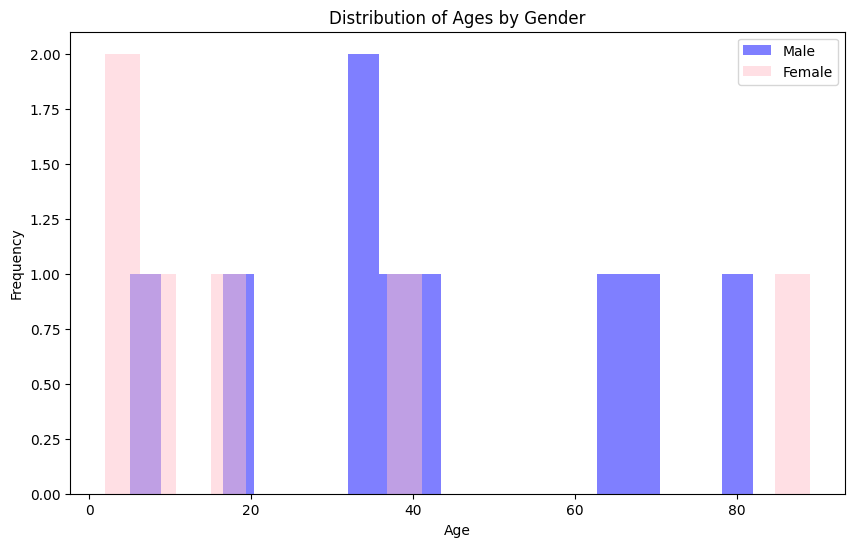

In [34]:
# Chart 1:  Histogram (Distribution of Ages By Gender)

# Define the SQL query to retrieve ages and genders
query = """
    SELECT age, gender
    FROM user;
"""

# Execute the query
cursor.execute(query)

# Fetch all the results
results = cursor.fetchall()

# Separate ages by gender
ages_male = [row[0] for row in results if row[1] == 'male']
ages_female = [row[0] for row in results if row[1] == 'female']

# Create a histogram
plt.figure(figsize=(10, 6))

# Plot histogram for males
plt.hist(ages_male, bins=20, alpha=0.5, label='Male', color='blue')

# Plot histogram for females
plt.hist(ages_female, bins=20, alpha=0.5, label='Female', color='pink')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Ages by Gender')
plt.legend()

# Show plot
plt.show()


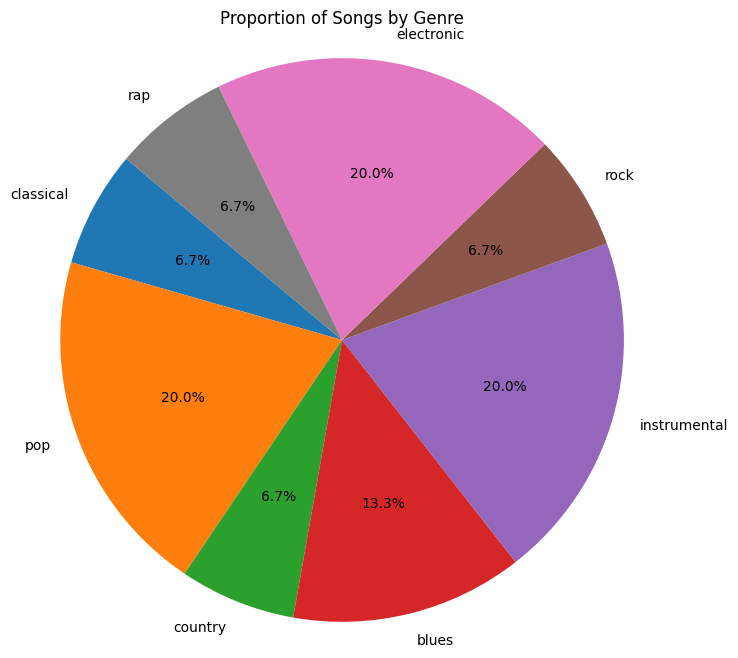

In [35]:
# Chart 2:  Pie Chart (Proportion of Songs by Genre)

# Define the SQL query to retrieve genres of songs
query = """
    SELECT genre, COUNT(*) AS count
    FROM song
    GROUP BY genre;
"""

# Execute the query
cursor.execute(query)

# Fetch all the results
results = cursor.fetchall()

# Extract genres and corresponding counts from results
genres = [row[0] for row in results]
counts = [row[1] for row in results]

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=genres, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Songs by Genre')
plt.axis('equal')  

# Show plot
plt.show()

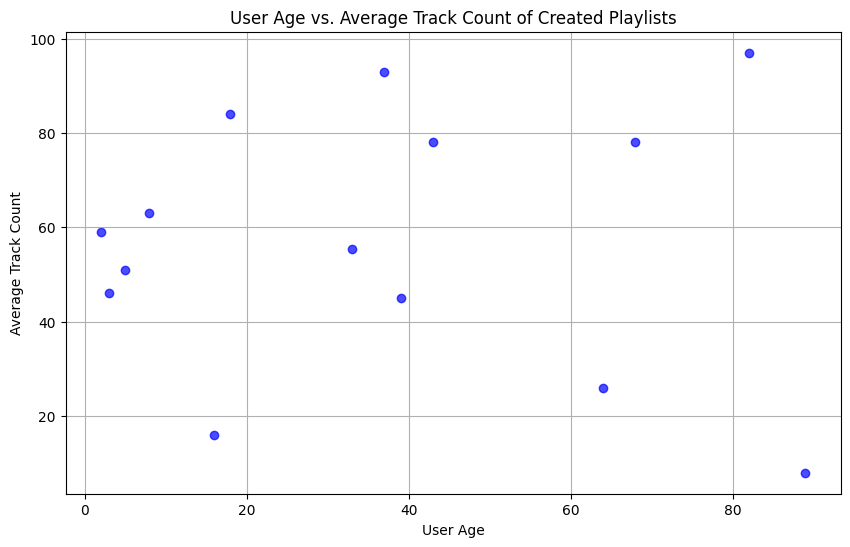

In [36]:
# Chart 3:  Scatter Plot (User Age vs. Average Track Count of Created Playlists)

# Define the SQL query to calculate average track count by user age
query = """
    SELECT u.age AS user_age, AVG(p.track_count) AS avg_track_count
    FROM user u
    JOIN creates c ON u.user_id = c.user_id
    JOIN playlist p ON c.playlist_id = p.playlist_id
    GROUP BY u.age;
"""

# Execute the query
cursor.execute(query)

# Fetch all the results
results = cursor.fetchall()

# Extract user ages and corresponding average track counts from results
user_ages = [row[0] for row in results]
avg_track_counts = [row[1] for row in results]

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(user_ages, avg_track_counts, color='b', alpha=0.7)
plt.title('User Age vs. Average Track Count of Created Playlists')
plt.xlabel('User Age')
plt.ylabel('Average Track Count')
plt.grid(True)

# Show plot
plt.show()

# Disconnect from MySQL Database

In [37]:
# Close cursor and connection
cursor.close()
connection.close()
print("MySQL connection is closed.")

MySQL connection is closed.
